In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from prep_plays import explore_plays_data, prep_plays_data
from wrangle_plays_data import train_validate_test, min_max_scale

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [3]:
train, validate, test = explore_plays_data()

# Does the offense formation matter? i.e. (is a certain offensive formation harder to defend?)

In [4]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
alpha = .05

- $H_0$: There is no dependence between offensive formation and pass stopped
- $H_a$: There is a dependence between offensive formation and pass stopped

In [4]:
observed = pd.crosstab(train.offenseFormation, train.pass_stopped)

In [5]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [6]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


0.019278800162284792

In [9]:
train.offenseFormation.value_counts()

SHOTGUN       4704
SINGLEBACK    1022
EMPTY          944
I_FORM         346
PISTOL          88
JUMBO            4
Name: offenseFormation, dtype: int64

In [5]:
form = train[train.offenseFormation != 'JUMBO']
form = form[form.offenseFormation != 'PISTOL']

In [17]:
custom_palette = ["red", "black"]

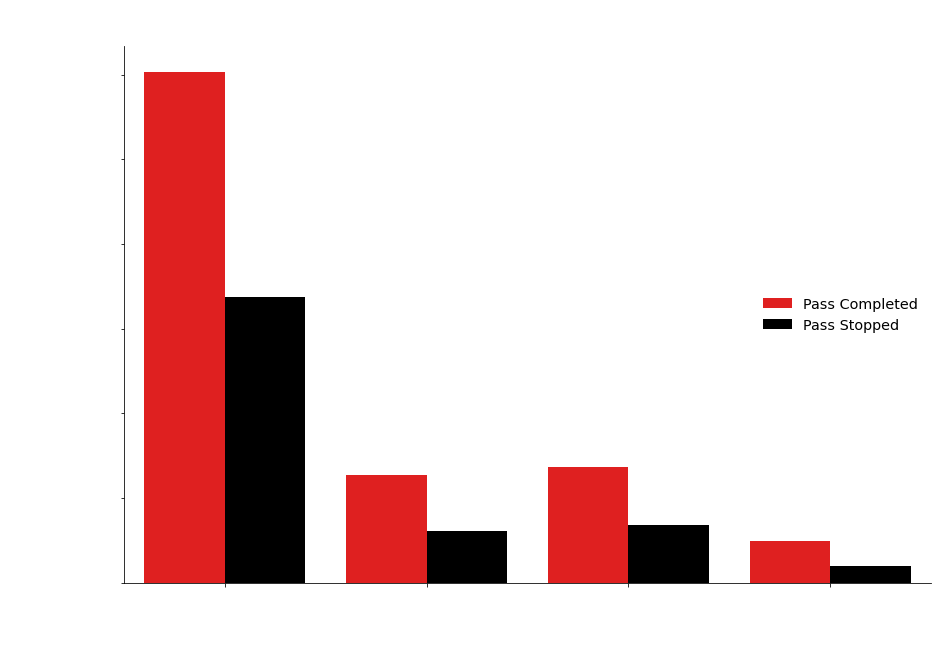

In [19]:
ax = sns.catplot(x="offenseFormation", hue="pass_stopped", kind="count", data=form, height=8, aspect=1.5, palette = custom_palette)
ax._legend.remove()
plt.title('Offensive Formation?', size = 40, c = 'white')
plt.xlabel('Offensive Formation', size = 30, c = 'white')
plt.ylabel('Number of Passes Stopped', size = 30, c = 'white')
plt.legend(labels = ('Pass Completed', 'Pass Stopped'), loc='center right', frameon=False, fontsize='x-large')
plt.xticks([0, 1, 2, 3], ['Shotgun', 'Empty', 'Singleback', 'I Formation'], size = 30, c = 'white')
plt.yticks(size = 30, c = 'white')
plt.show()

In [ ]:
barplot = plt.bar(y_pos, odds_number, color = 'darkgreen', alpha = 0.85)
barplot[0].set_color('darkred')

**Takeaways:**
- There does not seem to be a certain formation that will have there pass stopped more than others
- After a statistical test, we can safely say that there is not dependence on stopping the play and the formation the offense is lined up in.

In [8]:
train.groupby('offenseFormation').pass_stopped.count()

offenseFormation
EMPTY          944
I_FORM         346
JUMBO            4
PISTOL          88
SHOTGUN       4704
SINGLEBACK    1022
Name: pass_stopped, dtype: int64

In [9]:
train[train.pass_stopped ==1].groupby('offenseFormation').pass_stopped.count()

offenseFormation
EMPTY          308
I_FORM         101
JUMBO            3
PISTOL          28
SHOTGUN       1687
SINGLEBACK     339
Name: pass_stopped, dtype: int64

# What defense schemes work to prevent a successful pass?

In [ ]:
train.T

In [ ]:
  #setting conditions for conference
    conditions = [
        #west teams
        (nba.Team.isin(['LAL', 'LAC', 'DEN', 'HOU', 'OKC', 'UTA', 'DAL', 'POR', 'MEM', 'PHO', 'SAS', 'SAC', 'NOP', 'MIN', 'GSW'])),
        #east teams
        (nba.Team.isin(['MIL', 'TOR', 'BOS', 'IND', 'MIA', 'PHI', 'BRK', 'ORL', 'WAS', 'CHO', 'CHI', 'NYK', 'DET', 'ATL', 'CLE']))]
    choices = ['home_is_west', 'home_is_east']
    #creating conference column for home team
    nba['Conference'] = np.select(conditions, choices, default='west')

In [ ]:
train.personnelD.value_counts()

In [ ]:
conditions = [
    (np.where((df['DL'] == 4) & (df['LB'] == 3),1,0)), 
    (np.where((df['DL'] == 3) & (df['LB'] == 4),1,0)),
    (np.where(df['DB'] == 5, 1, 0)),
    (np.where(df['DB'] == 6, 1, 0))]
choices =  ['four_three', 'three_four', 'nickel', 'dime']
df['defenseFormation'] = np.select(conditions, choices)

# Grid Search CV

## Gradient Boost

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [11]:
df = prep_plays_data()

In [12]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,16997,16998,16999,17000,17001,17002,17003,17004,17005,17006
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...,(10:10) (Shotgun) N.Foles pass short left to N...,(9:24) (Shotgun) N.Foles pass incomplete short...,(9:08) M.Ryan pass incomplete deep left to M.S...,(7:01) M.Ryan pass short left to T.Coleman pus...,(6:19) M.Ryan pass short left to A.Hooper to P...,...,(7:39) (Shotgun) P.Rivers pass incomplete shor...,(7:35) (Shotgun) P.Rivers pass short right to ...,(6:51) P.Rivers pass short right to J.Jackson ...,(2:54) (Shotgun) P.Rivers pass short left to A...,(2:40) (Shotgun) P.Rivers pass short left to K...,(2:19) (Shotgun) P.Rivers pass short right to ...,(2:00) (Shotgun) P.Rivers pass short left to K...,(1:41) (Shotgun) P.Rivers pass incomplete shor...,(1:37) (Shotgun) P.Rivers pass incomplete deep...,(1:31) (Shotgun) P.Rivers pass deep middle int...
quarter,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
down,1,1,2,3,3,2,3,1,2,1,...,2,3,1,1,1,2,1,1,2,3
yardsToGo,15,10,10,10,1,8,4,10,13,10,...,6,6,10,20,10,2,10,10,10,10
team_by_comp_yds,3,3,3,3,3,8,8,3,3,3,...,19,19,19,19,19,19,19,19,19,19
defendersInTheBox,7,7,6,6,8,7,6,7,8,8,...,6,6,6,6,6,6,4,5,4,6
numberOfPassRushers,4,4,4,5,6,4,4,4,4,3,...,6,5,4,5,5,4,5,5,4,4
QB_under_pressure,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gameClock,15:00:00,13:10:00,13:05:00,13:01:00,10:59:00,10:10:00,09:24:00,09:08:00,07:01:00,06:19:00,...,07:39:00,07:35:00,06:51:00,02:54:00,02:40:00,02:19:00,02:00:00,01:41:00,01:37:00,01:31:00
absoluteYardlineNumber,90,49,49,49,11,14,18,54,46,20,...,51,51,44,59,85,77,70,53,53,53


In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df)

In [14]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test)

In [15]:
X_train_scaled.T

,12331,9633,13947,15562,5458,9060,7240,11494,3899,4911,...,13238,4813,15921,5634,7271,14217,15210,7739,14947,641
quarter,0.750000,0.750000,0.750000,0.500000,0.750000,0.500000,0.250000,0.500000,0.750000,0.750000,...,0.000000,0.500000,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.750000,0.750000
down,0.000000,0.666667,0.000000,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,...,0.333333,0.333333,0.666667,0.000000,0.333333,0.000000,0.333333,0.666667,0.333333,0.333333
yardsToGo,0.350000,0.200000,0.225000,0.225000,0.225000,0.150000,0.225000,0.225000,0.225000,0.225000,...,0.200000,0.175000,0.075000,0.225000,0.400000,0.225000,0.225000,0.175000,0.000000,0.225000
team_by_comp_yds,0.129032,0.967742,0.419355,0.741935,0.290323,0.193548,0.516129,0.516129,0.935484,0.645161,...,0.258065,0.612903,0.870968,0.741935,0.290323,0.612903,0.967742,0.000000,0.451613,1.000000
defendersInTheBox,0.444444,0.555556,0.444444,0.444444,0.555556,0.555556,0.444444,0.666667,0.555556,0.555556,...,0.666667,0.555556,0.555556,0.555556,0.333333,0.666667,0.555556,0.444444,0.555556,0.555556
numberOfPassRushers,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.625000,0.750000,0.500000,...,0.500000,0.625000,0.500000,0.625000,0.500000,0.625000,0.500000,0.625000,0.625000,0.500000
QB_under_pressure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
absoluteYardlineNumber,0.551020,0.530612,0.653061,0.204082,0.397959,0.969388,0.091837,0.846939,0.602041,0.663265,...,0.163265,0.612245,0.551020,0.561224,0.489796,0.295918,0.602041,0.642857,0.285714,0.397959
epa,0.504938,0.438884,0.516462,0.487386,0.500943,0.472021,0.714156,0.498758,0.534833,0.523429,...,0.578176,0.490003,0.633970,0.534033,0.507766,0.514925,0.581803,0.434986,0.507255,0.510363
DL,0.333333,0.666667,0.666667,0.500000,0.666667,0.500000,0.666667,0.666667,0.666667,0.500000,...,0.666667,0.333333,0.500000,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333


In [16]:
boost_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
ml = GridSearchCV(GradientBoostingClassifier(), boost_params, cv=5)
ml.fit(X_train_scaled, y_train)
print(ml.score(X_train_scaled, y_train))

0.9009803921568628


In [18]:
y_pred = ml.predict(X_train_scaled)

In [19]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))
cm

,0,1
0,4119,523
1,184,2314


In [20]:
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.957239,0.815650,0.90098,0.886445,0.907703
recall,0.887333,0.926341,0.90098,0.906837,0.900980
f1-score,0.920961,0.867479,0.90098,0.894220,0.902250
support,4642.000000,2498.000000,0.90098,7140.000000,7140.000000


In [21]:
### Gradient Boost

print(ml.score(X_validate_scaled, y_validate))

0.8836134453781512


In [22]:
y_pred_val = ml.predict(X_validate_scaled)

In [23]:
cm = pd.DataFrame(confusion_matrix(y_pred_val, y_validate))
cm

,0,1
0,2680,139
1,415,1526


In [24]:
class_report = pd.DataFrame(classification_report(y_validate, y_pred_val, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.950692,0.786193,0.883613,0.868442,0.893152
recall,0.865913,0.916517,0.883613,0.891215,0.883613
f1-score,0.906324,0.846367,0.883613,0.876346,0.885352
support,3095.000000,1665.000000,0.883613,4760.000000,4760.000000


In [26]:
print(ml.score(X_test_scaled, y_test))

0.8806116447755342


## Select Percentile

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
select = SelectPercentile(percentile=30) 
select.fit(X_train_scaled, y_train)

In [ ]:
X_train_selected = select.transform(X_train_scaled)

In [ ]:
print("X_train.shape: {}".format(X_train_scaled.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

In [ ]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

In [ ]:
X_train_select5 = X_train_scaled[['down', 'numberOfPassRushers', 'QB_under_pressure', 'epa', 'DB']]

In [ ]:
ml = GridSearchCV(GradientBoostingClassifier(), boost_params, cv=5)
ml.fit(X_train_select5, y_train)
print(ml.score(X_train_select5, y_train))

In [ ]:
y_pred_select = ml.predict(X_train_select5)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_select))
cm

## Select From Model

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
select = SelectFromModel(
        GradientBoostingClassifier(),
        threshold="median")

select.fit(X_train_scaled, y_train)
X_train_l1 = select.transform(X_train_scaled) 
print("X_train.shape: {}".format(X_train_scaled.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

In [ ]:
X_train_scaled

In [ ]:
X_train_scaled_select8 = X_train_scaled[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber', 'epa']]

In [ ]:
ml = GridSearchCV(GradientBoostingClassifier(), boost_params, cv=5)
ml.fit(X_train_scaled_select8, y_train)
print(ml.score(X_train_scaled_select8, y_train))

In [ ]:
y_pred = ml.predict(X_train_scaled_select8)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))
cm

In [ ]:
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
class_report

In [ ]:
X_validate_scaled_select8 = X_validate_scaled[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber', 'epa']]

In [ ]:
print(ml.score(X_validate_scaled_select8, y_validate))

In [ ]:
y_pred_val = ml.predict(X_validate_scaled_select8)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_pred_val, y_validate))
cm

In [ ]:
class_report = pd.DataFrame(classification_report(y_validate, y_pred_val, output_dict=True))
class_report

In [ ]:
X_test_scaled_select8 = X_test_scaled[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber', 'epa']]

In [ ]:
print(ml.score(X_test_scaled_select8, y_test))

In [ ]:
feature_importances = pd.DataFrame(ml.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

## Logistic coeff

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)
    
#creating a list comprehension for the column names
names = [column for column in X_train_scaled.columns]
#adding intercept to the end of the list
names.append('intercept')
#creating a dataframe from the regression coefficient values and intercept
coeff = pd.DataFrame(np.append(logit.coef_, logit.intercept_)).T
#renaming the column names with the list of names
coeff.columns = names

In [ ]:
coeff.T

In [ ]:
# ### Ridge Classifier

# clf = RidgeClassifierCV()
# clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))

# ### Random Forest

# tree = RandomForestClassifier()
# tree.fit(X_train, y_train)
# print(tree.score(X_train, y_train))

### Gradient Boost

In [ ]:
### Ridge Classifier

# print(clf.score(X_validate, y_validate))

# ### Random Forest

# print(tree.score(X_validate, y_validate))

# RFE selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
import matplotlib as plt

In [ ]:
estimators = [1,5,10,20,40]

In [ ]:
select = RFE(RandomForestClassifier(n_estimators=5, random_state=42),
                 n_features_to_select=5)

In [ ]:
select.fit(X_train, y_train)

In [ ]:
mask = select.get_support() 
plt.pyplot.matshow(mask.reshape(1, -1), cmap='gray_r') 

In [ ]:
X_train

# Train and Validate Functions

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import mglearn

In [ ]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, y_train, cv = 5) 
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

## Overfitting Parameters

In [ ]:
from sklearn.svm import SVC

In [ ]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
            # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validate set
        score = svm.score(X_validate, y_validate)
        # if we got a better score, store the score and parameters 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score)) 
print("Best parameters: {}".format(best_parameters))

In [ ]:
test_score = svm.score(X_test, y_test)
test_score

## Grid Search with Cross Validation

In [ ]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
# for each combination of parameters, # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5) # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set 
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)

In [ ]:
mglearn.plots.plot_cross_val_selection()

In [ ]:
# We are not using the validate stage to choose the test parameters

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
import mglearn

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# The best_score_ attribute stores the mean cross-validation accuracy, 
# with cross-validation performed on the training set.
# be careful not to confuse best_score_ with the generaliza‐ tion 
# performance of the model as computed by the score method on the test set.

In [ ]:
print("Validate set score: {:.2f}".format(grid_search.score(X_validate, y_validate)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_) # show the first 5 rows 
results.head()

In [ ]:
 scores = np.array(results.mean_test_score).reshape(6, 6)

In [ ]:
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                          ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [ ]:
fig, axes = plt.pyplot.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

## Nested Cross Validation

In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                             X_train, y_train, cv=5)
print("Cross-validation scores: ", scores) 
print("Mean cross-validation score: ", scores.mean())

In [ ]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid): 
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y): 
        # find best parameter using inner cross-validation 
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits 
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data 
                clf = Classifier(**parameters) 
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test]) 
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores) 
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set 
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [ ]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold 
scores = nested_cv(X_train, y_train, StratifiedKFold(5),
            StratifiedKFold(5), SVC, ParameterGrid(param_grid)) 
print("Cross-validation scores: {}".format(scores))

# End